In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
from matplotlib import font_manager

# 加载字体文件
font_path = "/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/figS1/compartment/arial.ttf"  # 替换为你的字体文件路径
font_manager.fontManager.addfont(font_path)

# 设置字体
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 14

In [3]:
resolution = 5000
clr_1 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/293T/regular_file/DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')

In [4]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()
hg38_arms = bioframe.make_viewframe(hg38_arms)

In [5]:
# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/293T/regular_file/DNaseC_293T_total_UMI_wlink_nochrCLMT_noheader.bedpe', schema='bedpe')
# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup_noheader.bedpe', schema='bedpe')
# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

#sites = ctcf.sort_values('score', ascending=False).head(1000)

# sites_1 = pd.read_csv('/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/figS3/S3C/R1/Hs_CTCF_gatc_down_signal_screen.bed2d', 
#                     sep='\t'
#                    )

sites_1 = pd.read_csv('/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/fig2/2D/R2/C-C_motif_pair_down.bedpe', 
                    sep='\t'
                   )
sites_1.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# sites_2 = pd.read_csv('/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/figS3/S3C/R1/Hs_CTCF_gatc_nosignal_signal_screen.bed2d', 
#                     sep='\t'
#                    )
sites_2 = pd.read_csv('/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/fig2/2D/R2/C-C_motif_pair_nosignal.bedpe', 
                    sep='\t'
                   )
sites_2.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

In [6]:
# expected_1 = expected_cis(
#     clr_1,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80)

In [7]:
pup_1 = coolpup.pileup(clr_1, 
                       sites_1, 
                       features_format='bedpe', 
                       view_df=hg38_arms, 
#                        groupby=['name'],
#                        local=True,
#                        flip_negative_strand=True, 
#                        expected_df=expected_1,
                       nshifts=20,
                       flank=200000, 
                       mindist=100, 
#                        maxdist=600_000,
#                        subset=2000, 
#                        seed=1,
                       min_diag=2, 
                       nproc=80
                      )

INFO:coolpuppy:('chr22_p', 'chr22_p'): 1
INFO:coolpuppy:('chr18_p', 'chr18_p'): 64
INFO:coolpuppy:('chr20_p', 'chr20_p'): 233
INFO:coolpuppy:('chr21_q', 'chr21_q'): 182
INFO:coolpuppy:('chr8_p', 'chr8_p'): 332
INFO:coolpuppy:('chr17_p', 'chr17_p'): 214
INFO:coolpuppy:('chr12_p', 'chr12_p'): 312
INFO:coolpuppy:('chr9_p', 'chr9_p'): 263
INFO:coolpuppy:('chr16_p', 'chr16_p'): 335
INFO:coolpuppy:('chr16_q', 'chr16_q'): 448
INFO:coolpuppy:('chr19_p', 'chr19_p'): 476
INFO:coolpuppy:('chr5_p', 'chr5_p'): 246
INFO:coolpuppy:('chrX_p', 'chrX_p'): 277
INFO:coolpuppy:('chr22_q', 'chr22_q'): 542
INFO:coolpuppy:('chr4_p', 'chr4_p'): 295
INFO:coolpuppy:('chr18_q', 'chr18_q'): 315
INFO:coolpuppy:('chr10_p', 'chr10_p'): 375
INFO:coolpuppy:('chr20_q', 'chr20_q'): 531
INFO:coolpuppy:('chr19_q', 'chr19_q'): 532
INFO:coolpuppy:('chr11_p', 'chr11_p'): 506
INFO:coolpuppy:('chr7_p', 'chr7_p'): 666
INFO:coolpuppy:('chr8_q', 'chr8_q'): 561
INFO:coolpuppy:('chr6_p', 'chr6_p'): 677
INFO:coolpuppy:('chr13_q', 'ch

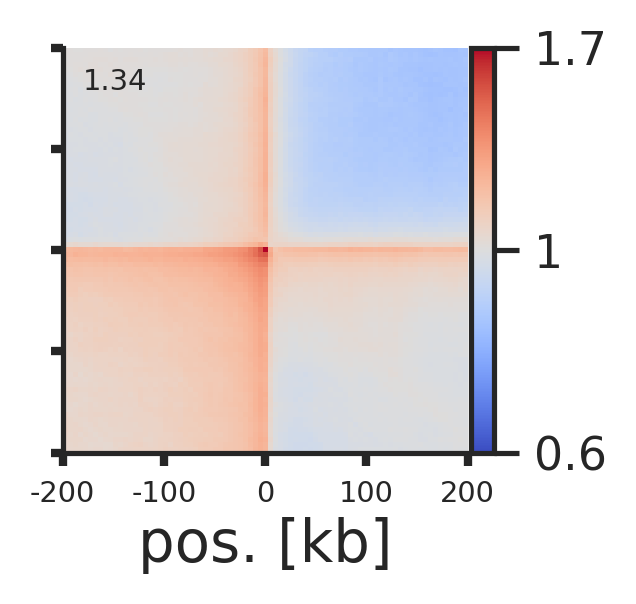

In [15]:
fig1 = plotpup.plot(pup_1,
             score=True, 
             cmap='coolwarm', 
#              scale='linear',
             sym=True, 
#              vmax=2,
#              vmin=0.073,
             height=2, 
             plot_ticks=True)

In [9]:
# fig1.savefig('DMSO4h.pdf')

In [10]:
pup_3 = coolpup.pileup(clr_1, 
                       sites_2, 
                       features_format='bedpe',
                       view_df=hg38_arms, 
#                        local=True,
#                        flip_negative_strand=True, 
#                        expected_df=expected_1,
                       nshifts=20,
                       flank=200000, 
                       mindist=100, 
#                        maxdist=600_000,
#                        subset=2000, 
#                        seed=1,
                       min_diag=2, 
                       nproc=80)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 67
INFO:coolpuppy:('chr17_p', 'chr17_p'): 232
INFO:coolpuppy:('chr5_p', 'chr5_p'): 180
INFO:coolpuppy:('chr12_p', 'chr12_p'): 199
INFO:coolpuppy:('chr16_p', 'chr16_p'): 312
INFO:coolpuppy:('chr20_p', 'chr20_p'): 244
INFO:coolpuppy:('chr21_q', 'chr21_q'): 230
INFO:coolpuppy:('chr10_p', 'chr10_p'): 222
INFO:coolpuppy:('chr4_p', 'chr4_p'): 263
INFO:coolpuppy:('chrX_p', 'chrX_p'): 290
INFO:coolpuppy:('chr9_p', 'chr9_p'): 282
INFO:coolpuppy:('chr8_p', 'chr8_p'): 388
INFO:coolpuppy:('chr18_q', 'chr18_q'): 359
INFO:coolpuppy:('chr19_p', 'chr19_p'): 512
INFO:coolpuppy:('chr19_q', 'chr19_q'): 582
INFO:coolpuppy:('chr11_p', 'chr11_p'): 493
INFO:coolpuppy:('chr22_q', 'chr22_q'): 571
INFO:coolpuppy:('chr16_q', 'chr16_q'): 550
INFO:coolpuppy:('chr7_p', 'chr7_p'): 534
INFO:coolpuppy:('chr6_p', 'chr6_p'): 548
INFO:coolpuppy:('chr13_q', 'chr13_q'): 387
INFO:coolpuppy:('chr20_q', 'chr20_q'): 647
INFO:coolpuppy:('chr8_q', 'chr8_q'): 504
INFO:coolpuppy:('chr7_q', 'c

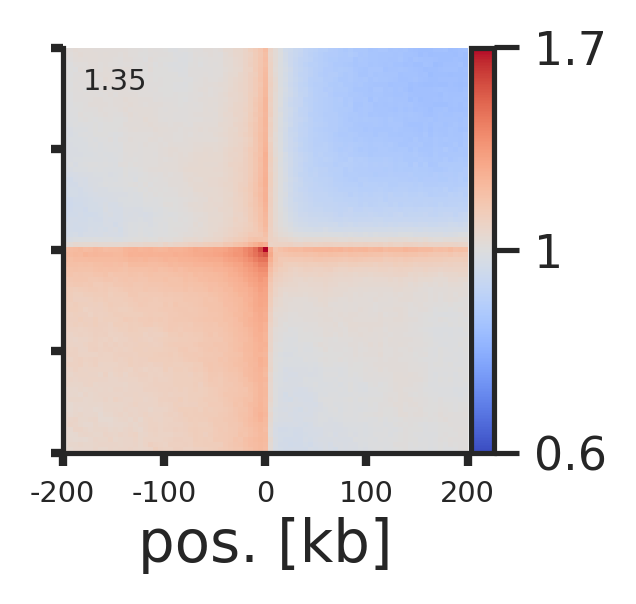

In [16]:
fig3 = plotpup.plot(pup_3,
             score=True, 
             cmap='coolwarm', 
#              scale='linear',
             sym=True, 
#              vmax=2,
#              vmin=0.5,
             height=2, 
             plot_ticks=True
            )

In [12]:
# fig3.savefig('dTAG4h.pdf')

INFO:coolpuppy:Can't use symmetrical scale with linear. Plotting non-symmetrical


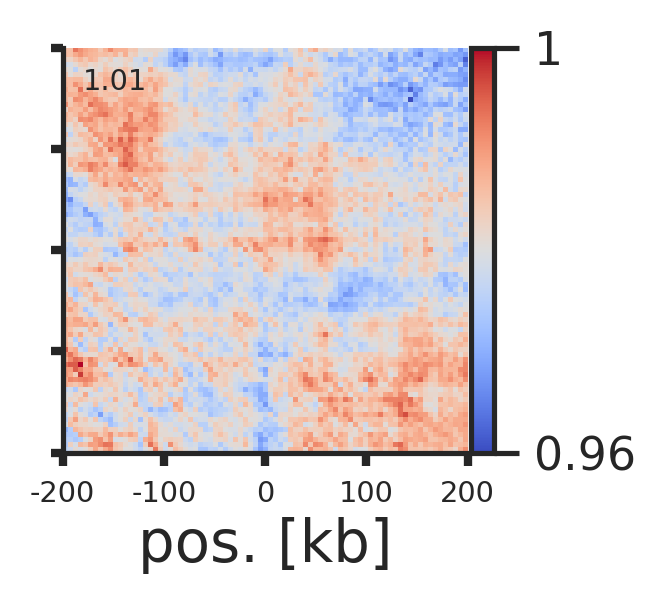

In [13]:
pup_divide = divide_pups(pup_3, pup_1)

fig_divide = plotpup.plot(pup_divide,
             score=True, 
             cmap='coolwarm', 
             scale='linear',
             sym=True, 
#              vmax=2.0,
#              vmin=1.0,
             height=2, 
             plot_ticks=True
            )

In [14]:
# fig_divide.savefig('dTAG-DMSO.pdf')